# PROJECT FOR CHRISTOPHE

## video_W596_W597_W602

+ animal on the left

In [1]:
from video_process_pck.motion_detector import *
from video_process_pck.plot_mvm import plot_mvm
import os
import numpy as np
import matplotlib.pyplot as plt

## Videos to process
+ 5 sessions 

In [2]:
with open("/media/data-108/Project_info/Sessions_to_process_Domi.txt") as f:
    lines = f.readlines()
    f.close()
    

In [7]:
lines

['Session\tEphys\n',
 "1\t'/media/data-106/2021-07-01_18-43-29/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1'\n",
 "2\t'/media/data-106/2021-07-02_17-51-26/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1'\n",
 "3\t'/media/data-106/2021-07-03_19-21-10/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1'\n",
 "4\t'/media/data-106/2021-07-04_10-17-07/RecordNode101/experiment2/recording1/continuous/Neuropix-PXI-100.1'\n",
 "5\t'/media/data-107/2021-07-05_18-30-06/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1'\n",
 '\n',
 'Session\tVideo\n',
 '1\tBasler_acA1300-60gmNIR__21471690__20210701_184333372\n',
 '2\tBasler_acA1300-60gmNIR__21471690__20210702_175129792\n',
 '3\tBasler_acA1300-60gmNIR__21471690__20210703_192113908\n',
 '4\tBasler_acA1300-60gmNIR__21471690__20210704_193426968\n',
 '5\tBasler_acA1300-60gmNIR__21471690__20210705_183011328\n']

In [3]:
lines2=",".join(lines)

In [17]:
lines2

"Session\tEphys\n,1\t'/media/data-106/2021-07-01_18-43-29/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1'\n,2\t'/media/data-106/2021-07-02_17-51-26/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1'\n,3\t'/media/data-106/2021-07-03_19-21-10/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1'\n,4\t'/media/data-106/2021-07-04_10-17-07/RecordNode101/experiment2/recording1/continuous/Neuropix-PXI-100.1'\n,5\t'/media/data-107/2021-07-05_18-30-06/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1'\n,\n,Session\tVideo\n,1\tBasler_acA1300-60gmNIR__21471690__20210701_184333372\n,2\tBasler_acA1300-60gmNIR__21471690__20210702_175129792\n,3\tBasler_acA1300-60gmNIR__21471690__20210703_192113908\n,4\tBasler_acA1300-60gmNIR__21471690__20210704_193426968\n,5\tBasler_acA1300-60gmNIR__21471690__20210705_183011328\n"

# Path to FOLDERS

In [4]:
#rats 672(L) & 674(R)
address="/media/data-108/Videos/video_W596_W597_W602"

#get the names of the videos to string list
video_list=os.listdir(address)

In [5]:
import re
for vid in video_list:
    #print("*"+str(vid)+"*")
    if vid[:-4] in lines2:
        print(vid)

Basler_acA1300-60gmNIR__21471690__20210702_175129792.mp4
Basler_acA1300-60gmNIR__21471690__20210705_183011328.mp4
Basler_acA1300-60gmNIR__21471690__20210704_193426968.mp4
Basler_acA1300-60gmNIR__21471690__20210701_184333372.mp4
Basler_acA1300-60gmNIR__21471690__20210703_192113908.mp4


In [32]:
#other_files
neuropix=["/media/data-106/2021-07-01_18-43-29/RecordNode101/experiment1/recording1/",
 "/media/data-106/2021-07-02_17-51-26/RecordNode101/experiment1/recording1/",
 "/media/data-106/2021-07-03_19-21-10/RecordNode101/experiment1/recording1/",
 "/media/data-106/2021-07-04_10-17-07/RecordNode101/experiment2/recording1/",
 "/media/data-107/2021-07-05_18-30-06/RecordNode101/experiment1/recording1/"]

# Inspect motion_detector() to personalize default parameters

In [3]:
# import required modules
import inspect
  
# use signature()
print(inspect.signature(motion_detector))

(path, scale_percent=40, area=20, delta_thresh=5, output_4csv='/home/domi/Documents/video_processing/CSV_data')


In [43]:
for vid in video_list:
    if vid[:-4] in lines2:
        print(vid)
        motion_detector(path=os.path.join(address,vid),
                        delta_thresh=1, #get raw diff
                        output_4csv=os.path.join("/home/domi/video_proc/CSV_data",
                                                 address[-16:]))

Basler_acA1300-60gmNIR__21471690__20210702_175129792.mp4
[INFO] elapsed time: 14514.49
[INFO] approx. FPS: 98.44
Basler_acA1300-60gmNIR__21471690__20210705_183011328.mp4
[INFO] elapsed time: 14691.05
[INFO] approx. FPS: 93.91
Basler_acA1300-60gmNIR__21471690__20210704_193426968.mp4
[INFO] elapsed time: 13589.01
[INFO] approx. FPS: 96.03
Basler_acA1300-60gmNIR__21471690__20210701_184333372.mp4
[INFO] elapsed time: 14410.36
[INFO] approx. FPS: 92.78
Basler_acA1300-60gmNIR__21471690__20210703_192113908.mp4
[INFO] elapsed time: 14158.51
[INFO] approx. FPS: 94.01


### **Take 5 processed csv and simlink for vids, create txt for each rat, save in new folder**

# to do: CHMOD data-119
folder name: rat{number}_pattern

In [7]:
output4ratFolders="/media/data-119/"

In [8]:
rat="rat596"

In [25]:
for vid in video_list:
    if vid[:-4] in lines2:
        #print(vid)
        
        #match date (session)
        pattern=vid[-22:-7]
        
        #name of the new folder on 119 for the session
        newFolder=rat+"_"+pattern
        print(newFolder)
        
        #create the new folder is it doen't exist
        if not os.path.exists(os.path.join(output4ratFolders,newFolder)):
            os.mkdir(os.path.join(output4ratFolders,newFolder))
        
            #create simlink for vid
            path2video=os.path.join(address,vid) #path to src
            os.symlink(path2video, os.path.join(output4ratFolders,newFolder,newFolder+".mp4"))
        
        

rat596_20210702_175129
rat596_20210705_183011
rat596_20210704_193426
rat596_20210701_184333
rat596_20210703_192113


In [43]:
def sync_creator(path2files):
    """creates sync channel for video"""
    
    lfp="continuous/Neuropix-PXI-100.1/"
    ttl="events/Neuropix-PXI-100.1/TTL_2/"
    tmp_ttl=np.load(os.path.join(path2files,ttl,"timestamps.npy"))
    chan_st=np.load(os.path.join(path2files,ttl,"channel_states.npy"))
    tmp_lfp=np.load(os.path.join(path2files,lfp,"timestamps.npy"))
    
    #substract beggining of recording from begging of vid for timestamps of binary =1
    tmp_vid = tmp_ttl[chan_st == 1] - tmp_lfp[0] - 1
    return tmp_vid

In [64]:
#groups=[]
import glob

#motion detection output csv files
mvmFolder="/home/domi/video_proc/CSV_data/o_W596_W597_W602/"
csvs=os.listdir(mvmFolder) 
for npix in neuropix:
    #create sync f. and save it to rat folders in 119
    
    #if vid[:-4] in lines2:       
    #    #match date (session)
    #    pattern=vid[-22:-7]
    
    
    #extract date from the session.. we will save the sync in the rat folder according to this pattern
    match=re.search("2021.(\d+).(\d+)", npix)
    date = pd.to_datetime(match.group(), format='%Y-%m-%d')
    dateInt=date.strftime("%Y%m%d")
            
    sync_chan=sync_creator(npix)
    print(sync_chan[:20])
    
    #destination folder:
    #print(glob.glob("/media/data-119/rat596_"+dateInt+"*/"))
    dest=os.path.join(glob.glob("/media/data-119/rat596_"+dateInt+"*/")[0])
    
    #save sync as txt
    np.savetxt(dest+"rat596_"+dateInt+"_"+dest[-7:-1]+"tmstp.txt",sync_chan,fmt='%s')
    
    #create txt file for mvm for the rat

    for i in range(len(csvs)):
        if re.search(dateInt, csvs[i]):
            df1 = pd.read_csv(os.path.join(mvmFolder,csvs[i]), sep='\t',
                             index_col="timestamp")
            
            rat1FileName=dest+"rat596_"+dateInt+"_"+dest[-7:-1]+"mvm.txt"
            np.savetxt(rat1FileName, df1["mvm_rat1"], delimiter="\t") 

[10056 10156 10256 10356 10456 10556 10656 10756 10856 10956 11056 11156
 11256 11356 11456 11557 11657 11757 11857 11957]
[7180 7280 7380 7480 7580 7680 7780 7880 7980 8080 8180 8280 8380 8480
 8580 8680 8780 8880 8980 9080]
[6282 6382 6482 6582 6682 6782 6882 6982 7082 7182 7282 7382 7482 7582
 7682 7782 7882 7982 8082 8182]
[10288 10388 10489 10589 10689 10789 10889 10989 11089 11189 11289 11389
 11489 11589 11689 11789 11889 11989 12089 12189]
[ 8957  9057  9157  9257  9357  9457  9557  9657  9757  9857  9957 10057
 10157 10257 10357 10457 10557 10657 10757 10857]


In [69]:
#create symlink for .dat and .eeg (->.lfp)
eegSource="continuous/Neuropix-PXI-100.1/"
datSource="continuous/Neuropix-PXI-100.0/"

for ad in neuropix:
    #match the date
    match=re.search("2021.(\d+).(\d+)", ad)
    date = pd.to_datetime(match.group(), format='%Y-%m-%d')
    dateInt=date.strftime("%Y%m%d")
    dest=os.path.join(glob.glob("/media/data-119/rat596_"+dateInt+"*/")[0])
    
    #create symlink eeg -> lfp
    try:
        os.symlink(os.path.join(ad,eegSource,"continuous.eeg"), dest+"rat596_"+dateInt+"_"+dest[-7:-1]+".lfp")
    except FileExistsError:
        pass
    
    #create symlink dat -> dat
    try:
        os.symlink(os.path.join(ad,datSource,"continuous.dat"), dest+"rat596_"+dateInt+"_"+dest[-7:-1]+".dat")
    except FileExistsError:
        pass

for animal in sessionsSYNC.keys():
    for tmstp in sessionsSYNC[animal]["tmstp_ttl"]:
        g=[tmstp]
        match=re.search("2021.(\d+).(\d+).(\d+).(\d+).(\d+)", tmstp)
        newSearch=match.group()
        for i in range(len(sessionsSYNC[animal]["channelStates_ttl"])):
            if re.search(newSearch, sessionsSYNC[animal]["channelStates_ttl"][i]):
                g.append(sessionsSYNC[animal]["channelStates_ttl"][i])
        for i in range(len(sessionsSYNC[animal]["tmstp_lfp"])):
            if re.search(newSearch, sessionsSYNC[animal]["tmstp_lfp"][i]):
                g.append(sessionsSYNC[animal]["tmstp_lfp"][i])
        groups.append(g)

In [ ]:
csvs=os.listdir("/home/domi/video_proc/CSV_data/o_W596_W597_W602/")
for i in range(len(csvs)):
    df1 = pd.read_csv(csvs[i], sep='\t',
                     index_col="timestamp")
    df1.index = pd.to_datetime(df1.index)
    p="/home/domi/Documents/video_processing/CSV_data/textFiles/"
    
    rat1FileName=p+'rat672_'+str(df1.index[0])+"_"+str(df1.index[-1])+'.txt'
    np.savetxt(rat1FileName.replace(" ","-"), df1["mvm_rat1"], delimiter="\t") 
    
    #rat2FileName=p+'rat674_'+str(df1.index[0])+"_"+str(df1.index[-1])+'.txt'
    #np.savetxt(rat2FileName.replace(" ","-"), df1["mvm_rat2"], delimiter="\t") 
    
    #timeFileName=p+'rat674_'+str(df1.index[0])+"_"+str(df1.index[-1])+'TIME.txt'
    #np.savetxt(timeFileName.replace(" ","-"), np.array(df1["duration"]), 
    #           delimiter="\t",fmt='%s') 

In [ ]:
#save sync channel in rat folders

In [ ]:
#timestamps_video_frames = timestamps_events[channel_states == 1] - timestamps_lfp[0] - 1

In [21]:
os.chdir("/home/domi/video_proc/CSV_data/video_W672_W674/")

https://fantashit.com/re-run-cmake-or-configure-script-in-function-cvshowimage/

In [31]:
csvs=os.listdir("/home/domi/video_proc/CSV_data/video_W672_W674/")

In [34]:
csvs[0]

'acA1300-60gmNIR__21471690__20211213_180838731.csv'

In [ ]:
df1 = pd.read_csv(csvs[0], sep='\t', parse_dates=["timestamp","duration"],
                 index_col="timestamp")

In [ ]:
#for csv in csvs[0]:
plot_mvm(csvs[0],
        start={"hours": 0, "minutes": 1, "seconds": 0},
         dt={"hours": 0, "minutes": 1, "seconds": 0},
         ylim=5 * 1e6,
         plot_all=True,
        save=True) 

In [36]:
first_vid = pd.read_csv(csvs[0],
                            sep='\t', index_col="timestamp", parse_dates=[2])

NameError: name 'ylim' is not defined

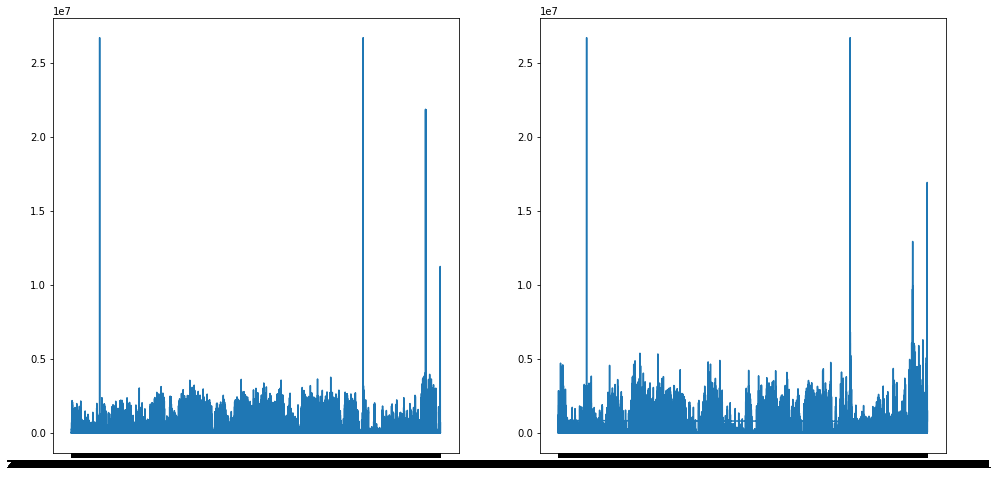

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    
ax1.plot(first_vid.index,
     first_vid["mvm_rat1"],
     label="rat_1")
ax2.plot(first_vid.index,
         first_vid["mvm_rat2"],
         label="rat_2")

for ax in [ax1, ax2]:
        ax.set_ylim((0, ylim))
        ax.set_title("movement (pixel change)", fontsize=20)
        ax.set_xlabel("time", fontsize=16)
        ax.set_ylabel("sum of pixel change", fontsize=16)
        ax.tick_params(axis='x', labelrotation=60, labelsize=14)
        ax.xaxis.set_major_locator(plt.AutoLocator())
        ax.legend()

## **Plot 5 videos from july MATHIAS**

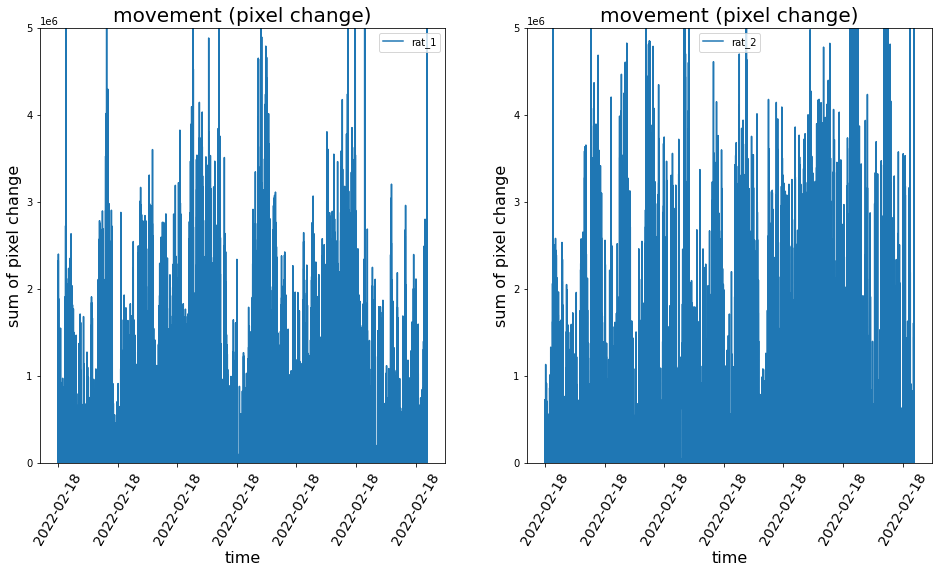

In [11]:
plot_mvm("/home/domi/video_proc/CSV_data/o_W596_W597_W602/acA1300-60gmNIR__21471690__20210701_184333372.csv")